In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [36]:
original_image_bgr = cv2.imread('original.jpg')
test_image_bgr = cv2.imread('test.jpg')

In [37]:
original_image_rgb = cv2.cvtColor(original_image_bgr, cv2.COLOR_BGR2RGB)
test_image_rgb = cv2.cvtColor(test_image_bgr, cv2.COLOR_BGR2RGB)

In [38]:
original_image_gray = cv2.cvtColor(original_image_bgr, cv2.COLOR_BGR2GRAY)
test_image_gray = cv2.cvtColor(test_image_bgr, cv2.COLOR_BGR2GRAY)

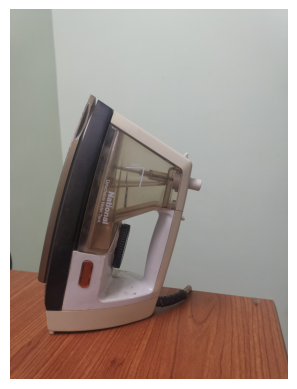

In [46]:
plt.imshow(original_image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

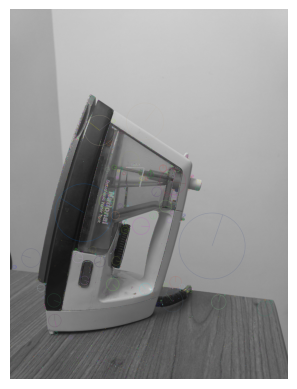

In [47]:
sift = cv2.SIFT_create()
kp, kpdesc = sift.detectAndCompute(original_image_gray, mask=None)
original_kp = None
img_kp = cv2.drawKeypoints(original_image_gray, kp, original_kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS + cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_kp);
plt.axis('off');

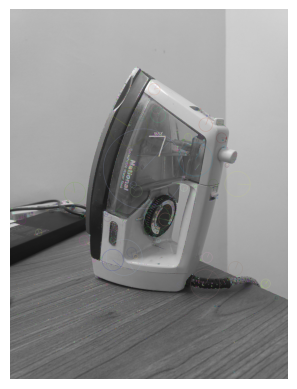

In [48]:
kp2, kp2desc = sift.detectAndCompute(test_image_gray, mask=None)
test_kp = None
test_kp = cv2.drawKeypoints(test_image_gray, kp2, test_kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS + cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(test_kp);
plt.axis('off');

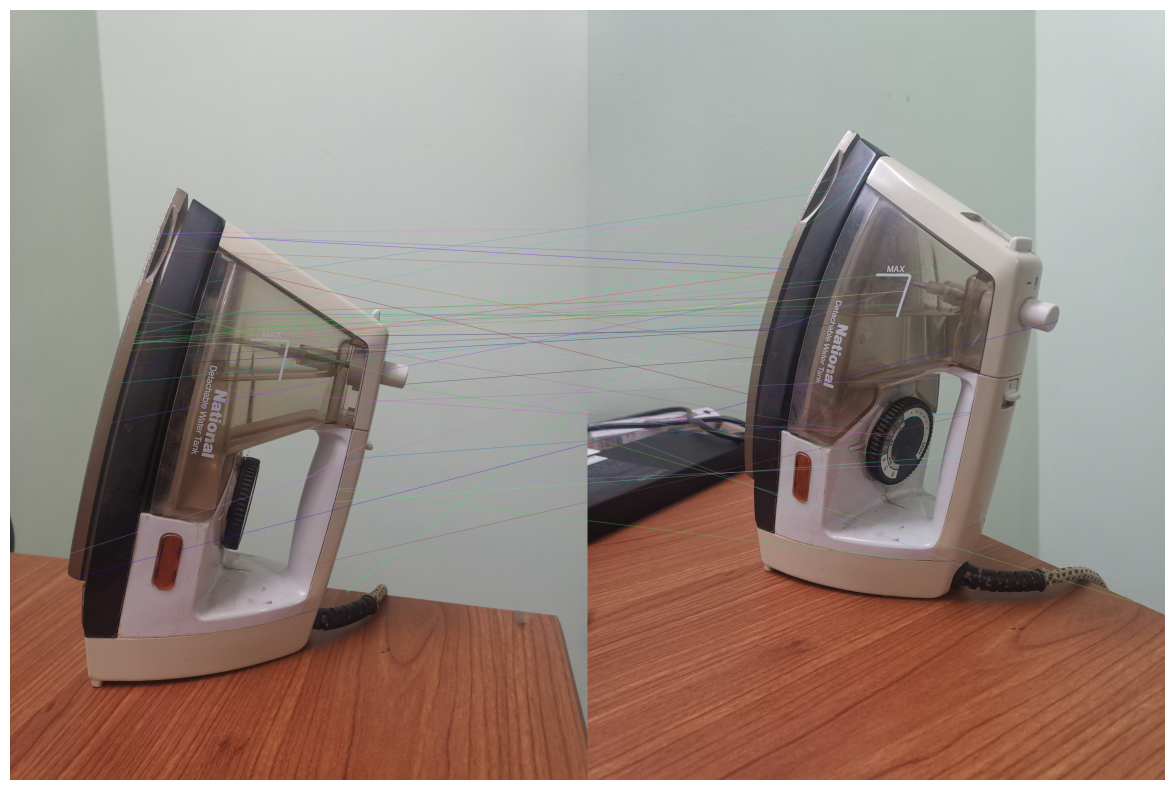

In [51]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(kpdesc, kp2desc)
matches = sorted(matches, key = lambda x:x.distance)
img_matches = None
img_matches = cv2.drawMatches(original_image_rgb, kp, test_image_rgb, kp2, matches[:42], img_matches,
                              flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS + cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 10));
plt.imshow(img_matches);
plt.axis('off');